In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import networkx as nx
from math import gcd
from functools import reduce

%matplotlib inline

In [64]:

# transition matrix
data = [90.81, 8.33, 0.68, 0.06, 0.08, 0.02, 0.01, 0.01,
        0.70, 90.65, 7.79, 0.64, 0.06, 0.13, 0.02, 0.01,
        0.09, 2.27, 91.05, 5.52, 0.74, 0.26, 0.01, 0.06,
        0.02, 0.33, 5.95, 85.93, 5.30, 1.17, 1.12, 0.18,
        0.03, 0.14, 0.67, 7.73, 80.53, 8.84, 1.00, 1.06,
        0.01, 0.11, 0.24, 0.43, 6.48, 83.46, 4.07, 5.20,
        0.21, 0.00, 0.22, 1.30, 2.38, 11.24, 64.86, 19.79,
        0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 100.00
        ]

Pmat = np.array(data).reshape(8, 8)
Pmat = Pmat / 100
print(Pmat)

indexlabelmap = {0: 'AAA', 1: 'AA', 2: 'A', 3: 'BBB', 4: 'BB', 5: 'B', 6: 'CCC', 7: 'D'}


[[9.081e-01 8.330e-02 6.800e-03 6.000e-04 8.000e-04 2.000e-04 1.000e-04
  1.000e-04]
 [7.000e-03 9.065e-01 7.790e-02 6.400e-03 6.000e-04 1.300e-03 2.000e-04
  1.000e-04]
 [9.000e-04 2.270e-02 9.105e-01 5.520e-02 7.400e-03 2.600e-03 1.000e-04
  6.000e-04]
 [2.000e-04 3.300e-03 5.950e-02 8.593e-01 5.300e-02 1.170e-02 1.120e-02
  1.800e-03]
 [3.000e-04 1.400e-03 6.700e-03 7.730e-02 8.053e-01 8.840e-02 1.000e-02
  1.060e-02]
 [1.000e-04 1.100e-03 2.400e-03 4.300e-03 6.480e-02 8.346e-01 4.070e-02
  5.200e-02]
 [2.100e-03 0.000e+00 2.200e-03 1.300e-02 2.380e-02 1.124e-01 6.486e-01
  1.979e-01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+00]]


In [69]:
# get n-step forward probability
def get_nstep_probability(transition_matrix):
    T = 500
    n = 8
    P = np.zeros((T,n,n),dtype=np.float64)
    Pmat = transition_matrix

    P[0] = Pmat
    for t in range(1,T-1):
        P[t] = np.matmul(P[t-1],Pmat)
    
    return P

# plot n step forward probability
def plot_transition(matrix):
    fig, axes = plt.subplots(8, 8, figsize=(15, 15))
    fig.tight_layout(pad=3)

    for i in range(8):
        for j in range(8):
            x_data = np.arange(100)
            y_data = matrix[:100, i, j]
            sns.lineplot(x= x_data, y=y_data, ax=axes[i, j])
            axes[i, j].set_title(f'P ({indexlabelmap[i]}, {indexlabelmap[j]})')
            axes[i, j].set_xlim(0, 100)
            axes[i, j].set_ylim(-0.05, 1.05)
            axes[i, j].set_xlabel('Step')
            axes[i, j].set_ylabel('Probability')

    plt.show()

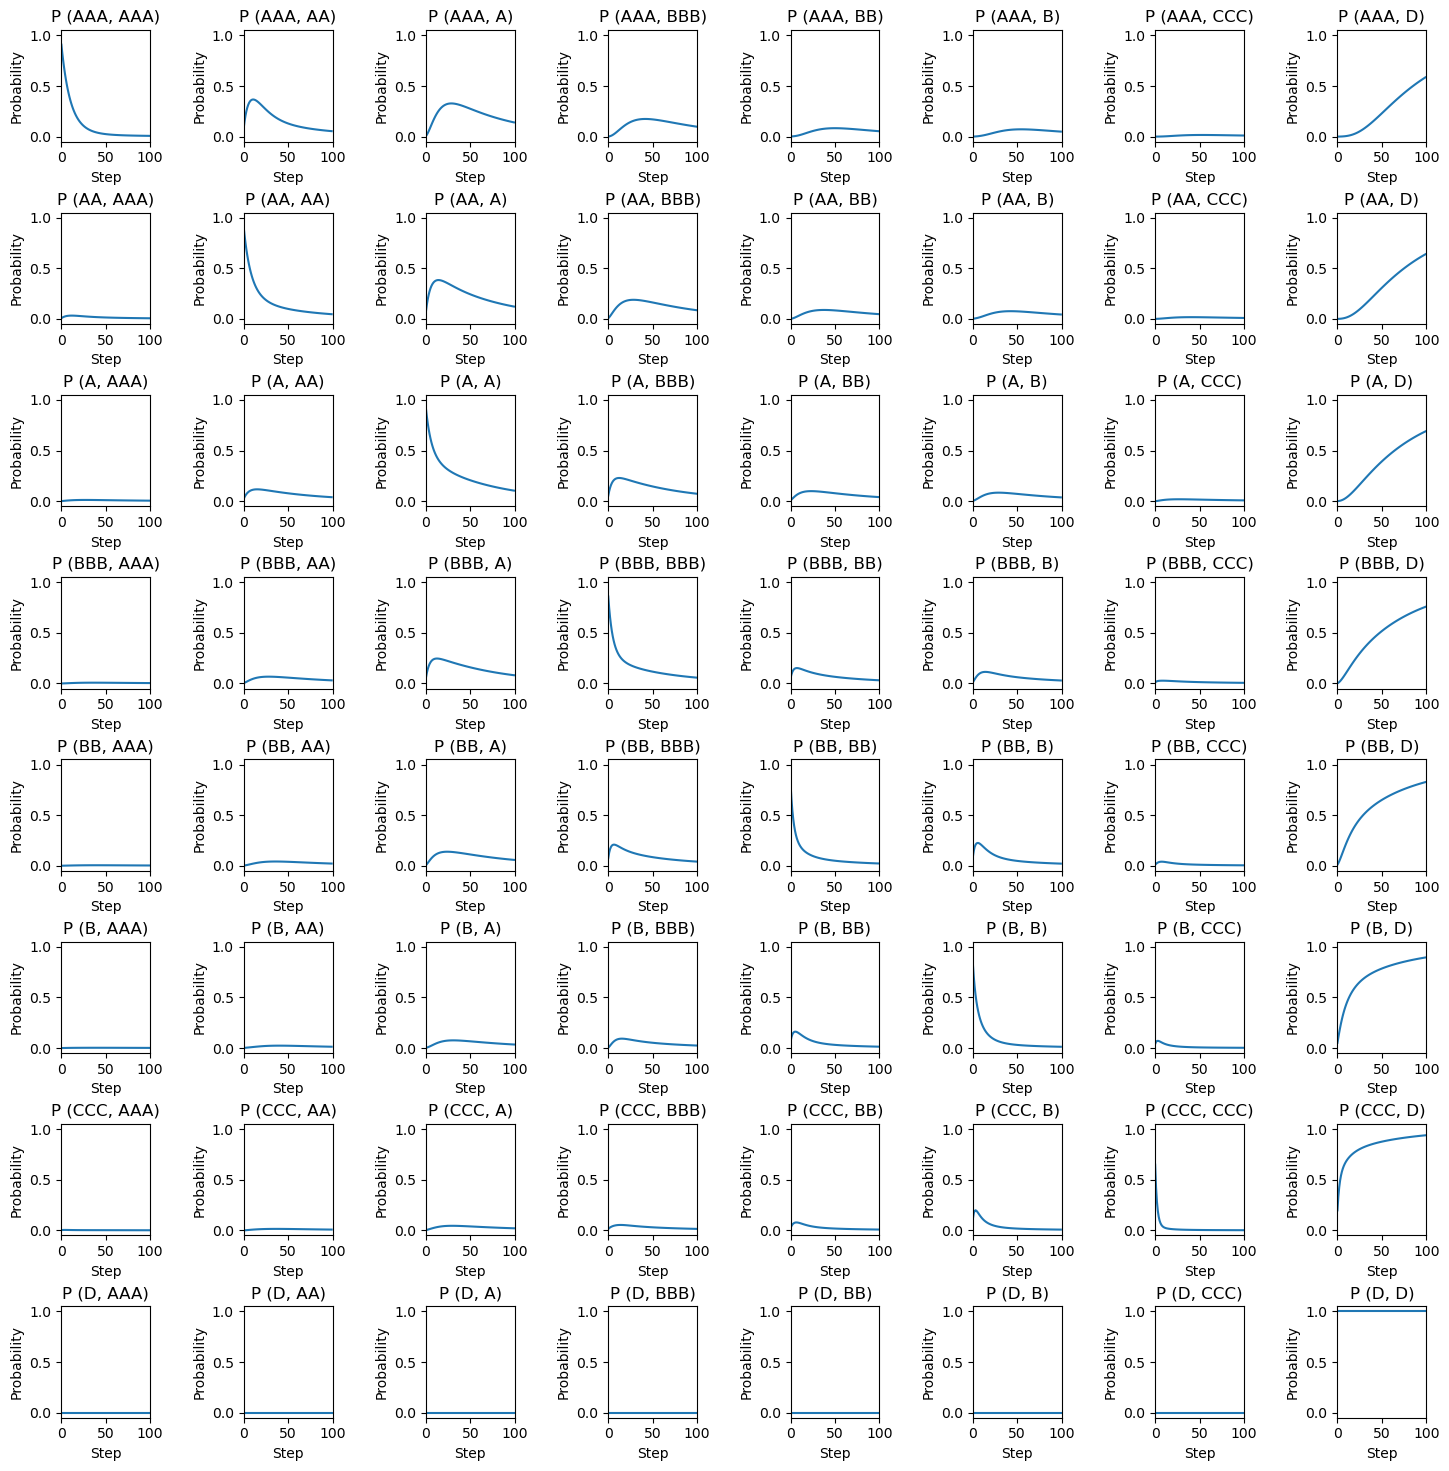

In [70]:
nstep_matrix = get_nstep_probability(Pmat)
plot_transition(nstep_matrix)

In [71]:
def determine_class(transition_matrix, indexlabelmap):
    assert(transition_matrix.shape[0] == transition_matrix.shape[1])
    A = transition_matrix.astype(bool)
    B = A

    for _ in range(transition_matrix.shape[0]):
        C = B + B.dot(A)
        if np.array_equal(B, C):
            break
        B = C
    uss = list(range(transition_matrix.shape[0]))
    css = []
    while (len(uss)):
        s = uss[0]
        j = np.argwhere(B[s,:] * B[:,s]).T[0]
        j = j if len(j) else [s]
        css.append([indexlabelmap[i] for i in j])
        uss = np.setdiff1d(uss,j)
    return css

In [72]:
cx = determine_class(Pmat, indexlabelmap)
print(f"{len(cx)} classes:\n {cx}")

2 classes:
 [['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC'], ['D']]


In [74]:
def find_periodicity(matrix):
    # Create directed graph from the given transition probability matrix
    G = nx.DiGraph(matrix)
    
    # Find all cycles in the graph
    cycles = list(nx.simple_cycles(G))
    cycle_lengths = [len(cycle) for cycle in cycles]
    
    # Find the greatest common divisor of all cycle lengths
    periodicity = reduce(gcd, cycle_lengths)
    
    return periodicity


Periodicity: 4


In [75]:
# find periodicity
periodicity = find_periodicity(Pmat)
print("Periodicity:", periodicity)

Periodicity: 1
